# Titanic Survival Exploration

## Numpy Arrays
#### Let's review what our train.csv data looked like in python up to this point. Run the following to load the data again:

In [71]:
import csv as csv
import numpy as np

csv_file_object = csv.reader(open('./train.csv', 'rb')) 
header = csv_file_object.next() 
data=[] 

for row in csv_file_object:
    data.append(row)
data = np.array(data)

#### Now type  print data 

In [72]:
print data

[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


#### This is familiar... an array of strings that the csv package was able to read.
#### Look at the first 15 rows of the Age column

In [73]:
data[0:15,5]

array(['22', '38', '26', '35', '35', '', '54', '2', '27', '14', '4', '58',
       '20', '39', '14'], 
      dtype='|S82')

#### Great, that command gives just the ages, and they are still stored as strings. What type of object is this whole column, though?

In [74]:
type(data[0::,5]) 

numpy.ndarray

## Pandas DataFrame

#### The first thing we have to do is import the Pandas package. It turns out that Pandas has its own functions to read or write a .csv file, so we are no longer actually using the csv package in the commands below. Let's create a new object called 'df' for storing the pandas version of train.csv. (This means you can still refer to the original 'data' numpy array for the rest of this tutorial anytime you want to compare and contrast.)

In [75]:
import pandas as pd
import numpy as np

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('train.csv', header=0)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [76]:
tst = pd.read_csv('test.csv', header=0)
tst.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


#### You notice it has column names, and it has the index of rows labelled down the side. (Note: you can also try  df.tail(3) and you can feed it any number of rows.) Now, compared to the original data array, what kind of object is this?

In [77]:
print type(df)  # What kind of object is this?

<class 'pandas.core.frame.DataFrame'>


#### Recall that using the csv package before, every value was interpreted as a string. But how does Pandas interpret them using its own csv reader?

In [78]:
print df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### Pandas is able to infer numerical types whenever it can detect them. So we have values already stored as integers. When it detected the existing decimal points somewhere in Age and Fare, it converted those columns to float. There are two more very valuable commands to learn on a dataframe:

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### There's a lot of useful info there! You can see immediately we have 891 entries (rows), and for most of the variables we have complete values (891 are non-null). But not for Age, or Cabin, or Embarked -- those have nulls somewhere. Now try:

In [80]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### This is also very useful: pandas has taken all of the numerical columns and quickly calculated the mean, std, minimum and maximum value. Convenient! But also a word of caution: we know there are a lot of missing values in Age, for example. How did pandas deal with that? It must have left out any nulls from the calculation. So if we start quoting the "average age on the Titanic" we need to caveat how we derived that number.

## Data Munging

#### One step in any data analysis is the data cleaning. Thankfully pandas makes things easier to filter, manipulate, drop out, fill in, transform and replace values inside the dataframe. Below we also learn the syntax that pandas allows for referring to specific columns.

### Referencing and filtering

In [81]:
df['Age'][0:10] # Let's acquire the first 10 rows of the Age column. 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [82]:
df.Age[0:10] # And try this alternative syntax

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [83]:
type(df['Age'])

pandas.core.series.Series

In [84]:
df['Age'].mean() # At this point, we'd really like to get than mean value

29.69911764705882

In [85]:
df['Age'].median() # See if you can obtain the .median of Age as well

28.0

#### The next thing we'd like to do is look at more specific subsets of the dataframe. Again pandas makes this very convenient to write. Pass it a [ list ] of the columns desired:

In [86]:
df[ ['Sex', 'Pclass', 'Age'] ].head()

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0


#### Filtering data is another important tool if we are investigating the data by hand. The .describe() command had indicated that the maximum age was 80. What do the older passengers look like in this data set? This is written by passing the criteria of df as a where clause into df:

In [87]:
df[df['Age'] > 60].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


#### If you were most interested in the mix of the gender and Passenger class of these older people, you would want to combine the two skills you just learned and get only a few columns for the same where filter:

In [88]:
df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']].head()

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0


#### From visual examination of all 22 cases, it seems they were mostly men, mostly(?) 1st class, and mostly perished.

#### Now it's time to investigate all of those missing Age values, because we will need to address them in our model if we hope to use all the data for more advanced algorithms. To filter for missing values, use

In [89]:
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


#### Here the only thing we did was print all 177 cases, but the same syntax can be used later if we take action on them.

#### It will also be useful to combine multiple criteria (joined by the syntax &). To practice even more functionality in the same line of code, let's take a count of the males in each class.

In [90]:
for i in range(1,4):
    print i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ])

1 122
2 108
3 347


#### Before we finish the initial investigation by hand, let's use one other convenience function of pandas to derive a histogram of any numerical column. The histogram function is really a shortcut to the more powerful features of the matplotlib/pylab packages, so let's be sure that's imported. Type the following:

Populating the interactive namespace from numpy and matplotlib


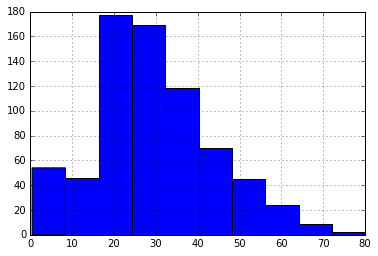

In [91]:
import pylab as P

%pylab inline

df['Age'].hist()
P.show()

#### Inside the parentheses of .hist(), you can also be more explicit about options of this function. Before you invoke it, you can also be explicit that you are dropping the missing values of Age:

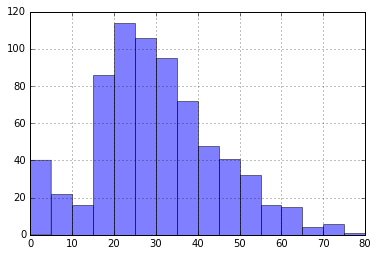

In [92]:
df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()

### Cleaning the data

#### Ok now that we are comfortable with the syntax, we are ready to begin transforming the values in the dataframe into the shape we need for machine learning. First of all, it's hard to run analysis on the string values of "male" and "female". Let's practice transforming it in three ways -- twice for fun and once to make it useful. We'll store our transformation in a new column, so the original Sex isn't changed.

#### In Pandas, adding a column is as easy as naming it and passing it new values.

In [93]:
df['Gender'] = 4
tst['Gender'] = 4

#### Show some .head() rows of the dataframe to see what we just accomplished. Well, now let's make it mean something that's actually derived from the Sex column.

In [94]:
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
tst['Gender'] = tst['Sex'].map( lambda x: x[0].upper() )

#### Iambda x is an built-in function of python for generating an anonymous function in the moment, at runtime. Remember that x[0] of any string returns its first character.

#### But of course what we really need is a binary integer for female and male, similar to the way Survived is stored. As a matter of consistency, let's also make Gender into values of 0 and 1's. We have a precedent of analyzing the women first in all of our previous arrays, so let's decide female = 0 and male = 1.  So, for real this time:

In [95]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
tst['Gender'] = tst['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

#### Now it's time to deal with the missing values of Age, because most machine learning will need a complete set of values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall predictive power of Age might still make a better model than before.  We know the average [known] age of all passengers is 29.6991176 -- we could fill in the null values with that. But maybe the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The Age histogram did seem positively skewed. These are the kind of decisions you make as you create your models in a Kaggle competition.

#### For now let's decide to be more sophisticated, that we want to use the age that was typical in each passenger class. And decide that the median might be better. Let's build another reference table to calculate what each of these medians are:

In [96]:
median_ages = np.zeros((2,3))
median_ages
median_ages_test = np.zeros((2,3))
median_ages_test

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

#### And then populating the array,

In [97]:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
 
median_ages

for i in range(0, 2):
    for j in range(0, 3):
        median_ages_test[i,j] = tst[(tst['Gender'] == i) & \
                              (tst['Pclass'] == j+1)]['Age'].dropna().median()
 
median_ages_test

array([[ 41.,  24.,  22.],
       [ 42.,  28.,  24.]])

#### We could fill in the missing ages directly into the Age column. But to be extra cautious and not lose the state of the original data, a more formal way would be to create a new column, AgeFill, and even record which ones were originally null (and thus artificially guessed).

#### Make a copy of Age:

In [98]:
df['AgeFill'] = df['Age']

df.head()

tst['AgeFill'] = tst['Age']

tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,22.0


#### Take a look at just the rows with missing values, and limit it to the columns important to us right now:

In [99]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


#### Use some code to fill in AgeFill based on our median_ages table. Here we happen to use the alternate syntax for referring to an existing column, like df.Age rather than df['Age'].  There's a where clause on df and referencing its column AgeFill, then assigning it an appropriate value out of median_ages.

In [100]:
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
for i in range(0, 2):
    for j in range(0, 3):
        tst.loc[ (tst.Age.isnull()) & (tst.Gender == i) & (tst.Pclass == j+1),\
                'AgeFill'] = median_ages_test[i,j]

#### View the exact same 10 rows we just looked at:

In [101]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


#### This confirms we accomplished exactly what we wanted.

#### Let's also create a feature that records whether the Age was originally missing. This is relatively simple by allowing pandas to use the integer conversion of the True/False evaluation of its built-in function, pandas.isnull()

In [102]:
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
tst['AgeIsNull'] = pd.isnull(tst.Age).astype(int)

#### Now that we have 3 new numerical columns, Gender, AgeFill, AgeIsNull... perhaps you want to run df.describe() to see the summary statistics of the whole dataframe again.

## Feature Engineering

#### Let's create a couple of other features, this time using simple math on existing columns. Since we know that Parch is the number of parents or children onboard, and SibSp is the number of siblings or spouses, we could collect those together as a FamilySize:

In [103]:
df['FamilySize'] = df['SibSp'] + df['Parch']
tst['FamilySize'] = tst['SibSp'] + tst['Parch']

#### We can also create artificial features if we think it may be advantageous to a machine learning algorithm -- of course, it might not. For example, we know Pclass had a large effect on survival, and it's possible Age will too. One artificial feature could incorporate whatever predictive power might be available from both Age and Pclass by multiplying them. This amplifies 3rd class (3 is a higher multiplier) at the same time it amplifies older ages. Both of these were less likely to survive, so in theory this could be useful.

In [104]:
df['Age*Class'] = df.AgeFill * df.Pclass
tst['Age*Class'] = tst.AgeFill * tst.Pclass

#### We could make some histograms of our new columns to understand them better. Go back and find the .hist() commands above.

#### We know we'd like to have better predictive power for the men, so you might be wishing you could pull out more information from the Name column -- for example the honorary or pedestrian title of the men? We won't accomplish that in this tutorial, but you may find ideas in the Kaggle forums.

## Final preparation

#### We have our data almost ready for machine learning. But most basic ML techniques will not work on strings, and in python they almost always require the data to be an array-- the implementations we will see in the sklearn package are not written to use a pandas dataframe. So the last two things we need to do are (1) determine what columns we have left which are not numeric, and (2) send our pandas.DataFrame back to a numpy.array.

#### In pandas you could always see the column types from the .info() method. You can also see them directly: 

In [105]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int32
AgeFill        float64
AgeIsNull        int32
FamilySize       int64
Age*Class      float64
dtype: object

#### With a little manipulation, we can require .dtypes to show only the columns which are 'object', which for pandas means it has strings:

df.dtypes[df.dtypes.map(lambda x: x=='object')]

#### (You may already have already transformed 'Embarked' in your own work above.)

#### The next step is to drop the columns which we will not use:

In [106]:
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
tst = tst.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

#### We can also drop 'Age' even though it is numeric, since we copied and filled that to a better column AgeFill. The original 'Age' still has the missing values which won't work well in our future model.

In [107]:
df = df.drop(['Age'], axis=1)
tst = tst.drop(['Age'], axis=1)

#### An alternate command is to drop any rows which still have missing values:

In [108]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
tst_clean = imp.fit_transform(tst)
df_clean = imp.fit_transform(df)

#### But remember that .dropna() removes an observation from df even if it only has 1 NaN, anywhere, in any of its columns. It could delete most of your dataset if you aren't careful with the state of missing values in other columns!

#### Now we have a clean and tidy dataset that is ready for analysis.

#### The final step is to convert it into a Numpy array. Pandas can always send back an array using the .values method. Assign to a new variable, train_data:

In [109]:
full_data = df_clean
test_true = tst_clean
colnames = list(df.columns.values)
full_data = pd.DataFrame(full_data, columns = colnames)
colnames_test = colnames.remove('Survived')
X_test_true = pd.DataFrame(test_true, columns = colnames)
full_data.head()
X_test_true.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,892.0,3.0,0.0,0.0,7.8292,1.0,34.5,0.0,0.0,103.5
1,893.0,3.0,1.0,0.0,7.0000,0.0,47.0,0.0,1.0,141.0
2,894.0,2.0,0.0,0.0,9.6875,1.0,62.0,0.0,0.0,124.0
3,895.0,3.0,0.0,0.0,8.6625,1.0,27.0,0.0,0.0,81.0
4,896.0,3.0,1.0,1.0,12.2875,0.0,22.0,0.0,2.0,66.0


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code block cell to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [110]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

# Create template for test output
test_output_temp = X_test_true.drop(['Pclass', 'SibSp', 'Parch', 'Fare', 'Gender', 'AgeFill',
       'AgeIsNull', 'FamilySize', 'Age*Class'], axis = 1)

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1.0,3.0,1.0,0.0,7.2500,1.0,22.0,0.0,1.0,66.0
1,2.0,1.0,1.0,0.0,71.2833,0.0,38.0,0.0,1.0,38.0
2,3.0,3.0,0.0,0.0,7.9250,0.0,26.0,0.0,0.0,78.0
3,4.0,1.0,1.0,0.0,53.1000,0.0,35.0,0.0,1.0,35.0
4,5.0,3.0,0.0,0.0,8.0500,1.0,35.0,0.0,0.0,105.0


In [111]:
display(X_test_true.head())

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,892.0,3.0,0.0,0.0,7.8292,1.0,34.5,0.0,0.0,103.5
1,893.0,3.0,1.0,0.0,7.0000,0.0,47.0,0.0,1.0,141.0
2,894.0,2.0,0.0,0.0,9.6875,1.0,62.0,0.0,0.0,124.0
3,895.0,3.0,0.0,0.0,8.6625,1.0,27.0,0.0,0.0,81.0
4,896.0,3.0,1.0,1.0,12.2875,0.0,22.0,0.0,2.0,66.0


In [112]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, outcomes, test_size=0.2, random_state=2016)
print 'Dimension of the training set', X_train.shape
print 'Dimension of the test set', X_test.shape
print 'Dimension of the true test set', test_true.shape

Dimension of the training set (712, 10)
Dimension of the test set (179, 10)
Dimension of the true test set (418L, 10L)


## Getting Started With Random Forests

In [113]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
clf_forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = clf_forest.fit(X_train, y_train)

# Take the same decision trees and run it on the test data
y_pred = forest.predict(X_test)
y_pred_true = forest.predict(X_test_true)

In [114]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

0.832402234637


In [115]:
# Model 1: KNN
from sklearn import neighbors
n_neighbors = 5
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')

# Model 2: SVC
from sklearn import svm
clf_svc = svm.SVC()

# Model 3: Emsemble AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=500)

In [116]:
import time
def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

In [117]:
# Fit KNN to training data
train_classifier(clf_knn, X_train, y_train)

Training KNeighborsClassifier...
Done!
Training time (secs): 0.001


In [118]:
# Fit SVC to training data
train_classifier(clf_svc, X_train, y_train)

Training SVC...
Done!
Training time (secs): 0.038


In [119]:
# Fit Emsemble AbaBoosting to training data
train_classifier(clf_ada, X_train, y_train)

Training AdaBoostClassifier...
Done!
Training time (secs): 0.880


In [120]:
# Predict on training set and compute accuracy score

def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return accuracy_score(target.values, y_pred)

In [121]:
train_knn_accuracy = predict_labels(clf_knn, X_train, y_train)
print "Accuracy score for test set: {}".format(predict_labels(clf_knn, X_test, y_test))

Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.005
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.003
Accuracy score for test set: 0.648044692737


In [122]:
train_svc_score = predict_labels(clf_svc, X_train, y_train)
print "Accuracy score for test set: {}".format(predict_labels(clf_svc, X_test, y_test))

Predicting labels using SVC...
Done!
Prediction time (secs): 0.027
Predicting labels using SVC...
Done!
Prediction time (secs): 0.007
Accuracy score for test set: 0.63687150838


In [123]:
train_boosting_score = predict_labels(clf_ada, X_train, y_train)
print "Accuracy score for test set: {}".format(predict_labels(clf_ada, X_test, y_test))

Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.077
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.046
Accuracy score for test set: 0.793296089385


In [124]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    print "Accuracy score for training set: {}".format(predict_labels(clf, X_train, y_train))
    print "Accuracy score for test set: {}".format(predict_labels(clf, X_test, y_test))

### Creating training set of different sizes

In [125]:
X_train_85, X_test_85, y_train_85, y_test_85 = train_test_split(data, outcomes, train_size=0.85, random_state=2016)
print 'Dimension of the training set at ratio of 85', X_train_85.shape
print 'Dimension of the test set at ratio of 85', X_test_85.shape
print""

X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(data, outcomes, train_size=0.90, random_state=2016)
print 'Dimension of the training set at ratio of 90', X_train_90.shape
print 'Dimension of the test set at ratio of 90', X_test_90.shape
print""

X_train_75, X_test_75, y_train_75, y_test_75 = train_test_split(data, outcomes, train_size=0.75, random_state=2016)
print 'Dimension of the training set at ratio of 75', X_train_75.shape
print 'Dimension of the test set at ratio of 75', X_test_75.shape
print""

X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(data, outcomes, train_size=0.70, random_state=2016)
print 'Dimension of the training set at ratio of 70', X_train_70.shape
print 'Dimension of the test set at ratio of 70', X_test_70.shape

Dimension of the training set at ratio of 85 (757, 10)
Dimension of the test set at ratio of 85 (134, 10)

Dimension of the training set at ratio of 90 (801, 10)
Dimension of the test set at ratio of 90 (90, 10)

Dimension of the training set at ratio of 75 (668, 10)
Dimension of the test set at ratio of 75 (223, 10)

Dimension of the training set at ratio of 70 (623, 10)
Dimension of the test set at ratio of 70 (268, 10)


In [126]:
# Model 1: KNN
train_predict(clf_knn, X_train_70, y_train_70, X_test, y_test)
print ""
train_predict(clf_knn, X_train_75, y_train_75, X_test, y_test)
print ""
train_predict(clf_knn, X_train, y_train, X_test, y_test)
print ""
train_predict(clf_knn, X_train_85, y_train_85, X_test, y_test)
print ""
train_predict(clf_knn, X_train_90, y_train_90, X_test, y_test)

------------------------------------------
Training set size: 623
Training KNeighborsClassifier...
Done!
Training time (secs): 0.001
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.005
Accuracy score for training set: 1.0
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.001
Accuracy score for test set: 0.664804469274

------------------------------------------
Training set size: 668
Training KNeighborsClassifier...
Done!
Training time (secs): 0.001
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.004
Accuracy score for training set: 1.0
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.001
Accuracy score for test set: 0.653631284916

------------------------------------------
Training set size: 712
Training KNeighborsClassifier...
Done!
Training time (secs): 0.001
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.007
Accuracy score fo

In [127]:
# Model 2: SVC
train_predict(clf_svc, X_train_70, y_train_70, X_test, y_test)
print ""
train_predict(clf_svc, X_train_75, y_train_75, X_test, y_test)
print ""
train_predict(clf_svc, X_train, y_train, X_test, y_test)
print ""
train_predict(clf_svc, X_train_85, y_train_85, X_test, y_test)
print ""
train_predict(clf_svc, X_train_90, y_train_90, X_test, y_test)

------------------------------------------
Training set size: 623
Training SVC...
Done!
Training time (secs): 0.030
Predicting labels using SVC...
Done!
Prediction time (secs): 0.020
Accuracy score for training set: 1.0
Predicting labels using SVC...
Done!
Prediction time (secs): 0.006
Accuracy score for test set: 0.63687150838

------------------------------------------
Training set size: 668
Training SVC...
Done!
Training time (secs): 0.039
Predicting labels using SVC...
Done!
Prediction time (secs): 0.026
Accuracy score for training set: 1.0
Predicting labels using SVC...
Done!
Prediction time (secs): 0.006
Accuracy score for test set: 0.63687150838

------------------------------------------
Training set size: 712
Training SVC...
Done!
Training time (secs): 0.038
Predicting labels using SVC...
Done!
Prediction time (secs): 0.024
Accuracy score for training set: 1.0
Predicting labels using SVC...
Done!
Prediction time (secs): 0.006
Accuracy score for test set: 0.63687150838

-------

In [128]:
# Model 3: Emsemble AdaBoosting
train_predict(clf_ada, X_train_70, y_train_70, X_test, y_test)
print ""
train_predict(clf_ada, X_train_75, y_train_75, X_test, y_test)
print ""
train_predict(clf_ada, X_train, y_train, X_test, y_test)
print ""
train_predict(clf_ada, X_train_85, y_train_85, X_test, y_test)
print ""
train_predict(clf_ada, X_train_90, y_train_90, X_test, y_test)

------------------------------------------
Training set size: 623
Training AdaBoostClassifier...
Done!
Training time (secs): 1.052
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.072
Accuracy score for training set: 0.895666131621
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.052
Accuracy score for test set: 0.815642458101

------------------------------------------
Training set size: 668
Training AdaBoostClassifier...
Done!
Training time (secs): 0.902
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.075
Accuracy score for training set: 0.898203592814
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.050
Accuracy score for test set: 0.793296089385

------------------------------------------
Training set size: 712
Training AdaBoostClassifier...
Done!
Training time (secs): 1.038
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.074
Accuracy sc

In [129]:
# Model 4: Emsemble Random Forest
train_predict(clf_forest, X_train_70, y_train_70, X_test, y_test)
print ""
train_predict(clf_forest, X_train_75, y_train_75, X_test, y_test)
print ""
train_predict(clf_forest, X_train, y_train, X_test, y_test)
print ""
train_predict(clf_forest, X_train_85, y_train_85, X_test, y_test)
print ""
train_predict(clf_forest, X_train_90, y_train_90, X_test, y_test)

------------------------------------------
Training set size: 623
Training RandomForestClassifier...
Done!
Training time (secs): 0.210
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.011
Accuracy score for training set: 1.0
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.007
Accuracy score for test set: 0.837988826816

------------------------------------------
Training set size: 668
Training RandomForestClassifier...
Done!
Training time (secs): 0.213
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.012
Accuracy score for training set: 1.0
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.007
Accuracy score for test set: 0.837988826816

------------------------------------------
Training set size: 712
Training RandomForestClassifier...
Done!
Training time (secs): 0.194
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.013
A

In [130]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
accuracy_scorer = make_scorer(accuracy_score)
# Gridsearch on Emsemble Random Forest
tuned_parameters_rf = {'criterion':("gini", "entropy"), 
                        'n_estimators':[10, 100, 250, 500]
                        }
# 'max_depth':[5, 10, 15, 20, 30] 
rf = RandomForestClassifier(random_state = 2016)

rf_best = GridSearchCV(rf, tuned_parameters_rf, scoring=accuracy_scorer, cv = 5)
rf_best.fit(X_train, y_train)

rf_best_85 = GridSearchCV(rf, tuned_parameters_rf, scoring=accuracy_scorer, cv = 5)
rf_best_85.fit(X_train_85, y_train_85)

rf_best_90 = GridSearchCV(rf, tuned_parameters_rf, scoring=accuracy_scorer, cv = 5)
rf_best_90.fit(X_train_90, y_train_90)

print("Best parameters set found on development set:")
print ""
print "best for 80", rf_best.best_params_
print "best for 85", rf_best_85.best_params_
print "best for 90", rf_best_90.best_params_
print ""
print("Grid scores on development set:")
print ""
for params, mean_score, scores in rf_best.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
    % (mean_score, scores.std() * 2, params))
print ""
print predict_labels(rf_best, X_test, y_test)
print predict_labels(rf_best_85, X_test, y_test)
print predict_labels(rf_best_90, X_test, y_test)

Best parameters set found on development set:

best for 80 {'n_estimators': 500, 'criterion': 'gini'}
best for 85 {'n_estimators': 100, 'criterion': 'gini'}
best for 90 {'n_estimators': 500, 'criterion': 'gini'}

Grid scores on development set:

0.794 (+/-0.058) for {'n_estimators': 10, 'criterion': 'gini'}
0.796 (+/-0.058) for {'n_estimators': 100, 'criterion': 'gini'}
0.794 (+/-0.057) for {'n_estimators': 250, 'criterion': 'gini'}
0.803 (+/-0.055) for {'n_estimators': 500, 'criterion': 'gini'}
0.791 (+/-0.049) for {'n_estimators': 10, 'criterion': 'entropy'}
0.801 (+/-0.058) for {'n_estimators': 100, 'criterion': 'entropy'}
0.798 (+/-0.059) for {'n_estimators': 250, 'criterion': 'entropy'}
0.801 (+/-0.056) for {'n_estimators': 500, 'criterion': 'entropy'}

Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.050
0.837988826816
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.009
0.860335195531
Predicting labels using GridSearchCV...
Done!
Pre

In [131]:
# Gridsearch on Emsemble Adaboost
tuned_parameters_ada = {'n_estimators':[50, 100, 150]}
ada = AdaBoostClassifier(random_state = 2016)

ada_best = GridSearchCV(ada, tuned_parameters_ada, scoring=accuracy_scorer, cv = 5)
ada_best.fit(X_train, y_train)

ada_best_85 = GridSearchCV(ada, tuned_parameters_ada, scoring=accuracy_scorer, cv = 5)
ada_best_85.fit(X_train_85, y_train_85)

ada_best_90 = GridSearchCV(ada, tuned_parameters_ada, scoring=accuracy_scorer, cv = 5)
ada_best_90.fit(X_train_90, y_train_90)

print("Best parameters set found on development set:")
print ""
print(ada_best.best_params_)
print(ada_best_85.best_params_)
print(ada_best_90.best_params_)
print ""
print("Grid scores on development set:")
print ""
for params, mean_score, scores in ada_best.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
    % (mean_score, scores.std() * 2, params))
print ""
print predict_labels(ada_best, X_test, y_test)
print predict_labels(ada_best_85, X_test, y_test)
print predict_labels(ada_best_90, X_test, y_test)

Best parameters set found on development set:

{'n_estimators': 50}
{'n_estimators': 50}
{'n_estimators': 50}

Grid scores on development set:

0.789 (+/-0.055) for {'n_estimators': 50}
0.789 (+/-0.049) for {'n_estimators': 100}
0.788 (+/-0.061) for {'n_estimators': 150}

Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.007
0.793296089385
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.005
0.804469273743
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.005
0.832402234637


In [132]:
# Gridsearch on SVM
#tuned_parameters_svc = {'kernel':('rbf', 'sigmoid')}
#svc = svm.SVC(random_state = 2016)

# 'C':np.arange(1, 5, 0.5)

#svc_best = GridSearchCV(svc, tuned_parameters_svc, scoring=accuracy_scorer, cv = 5)
#svc_best.fit(X_train, y_train)

#print("Best parameters set found on development set:")
#print ""
#print(svc_best.best_params_)
#print ""
#print("Grid scores on development set:")
#print ""
#for params, mean_score, scores in svc_best.grid_scores_:
#    print("%0.3f (+/-%0.03f) for %r"
#    % (mean_score, scores.std() * 2, params))
#print ""
#print predict_labels(svc_best, X_test, y_test)

In [133]:
test_output_temp
print test_output_temp.head()

   PassengerId
0        892.0
1        893.0
2        894.0
3        895.0
4        896.0


In [68]:
# Build ada best output
y_pred_true_ada_best_90 = ada_best_90.predict(X_test_true)
y_pred_true_ada_best_90 = int32(y_pred_true_ada_best_90)

# Build rf best output
y_pred_true_rf_best_90 = rf_best_90.predict(X_test_true)
y_pred_true_rf_best_90 = int32(y_pred_true_ada_best_90)

# Buidling super 
great_rf = RandomForestClassifier(n_estimators = 500)
super_classifier = AdaBoostClassifier(base_estimator = great_rf)
super_classifier.fit(X_train_90, y_train_90)
y_pred_true_super = super_classifier.predict(X_test_true)
y_pred_true_super = int32(y_pred_true_super)

print y_pred_true_ada_best_90
print y_pred_true_rf_best_90
print y_pred_true_super

[0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
[0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 

In [138]:
test_output_temp['PassengerId'] = test_output_temp['PassengerId'].astype(int)
test_output_temp['Survived'] = y_pred_true_ada_best_90
test_output_temp.to_csv('ada_model.csv', index = False)

In [139]:
test_output_temp['Survived'] = y_pred_true_rf_best_90
test_output_temp.to_csv('rf_model.csv', index = False)

In [140]:
test_output_temp['Survived'] = y_pred_true_super
test_output_temp.to_csv('super_model.csv', index = False)